In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.40. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

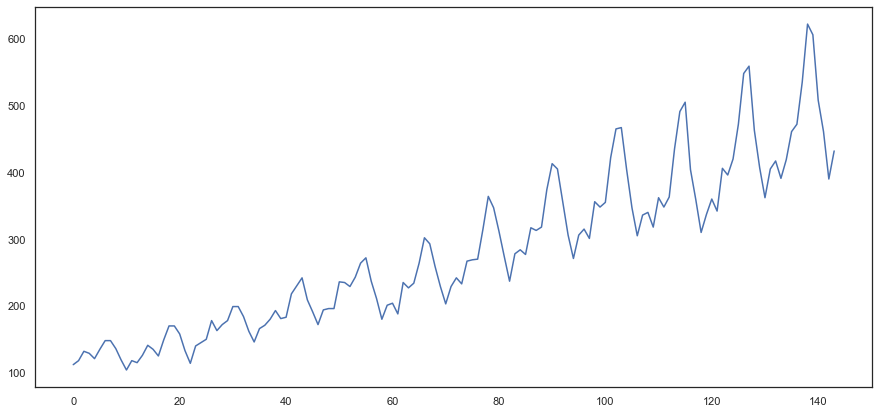

In [4]:
dataset['Passengers'].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [6]:
FORECAST_PERIOD = 12

In [7]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['ML'],
                verbose=2)

In [8]:
num = 140
traindata = dataset[:num]
testdata = dataset[num:]
print(traindata.shape, testdata.shape)

(140, 2) (4, 2)


Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      0.8237298401816036      |
|           p-value           |      0.9920097147604202      |
|          #Lags Used         |             13.0             |
| Number of Observations Used |            126.0             |
|     Critical Value (1%)     |     -3.4833462346078936      |
|     Critical Value (5%)     |     -2.8847655969877666      |
|     Critical Value (10%)    |     -2.5791564575459813      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

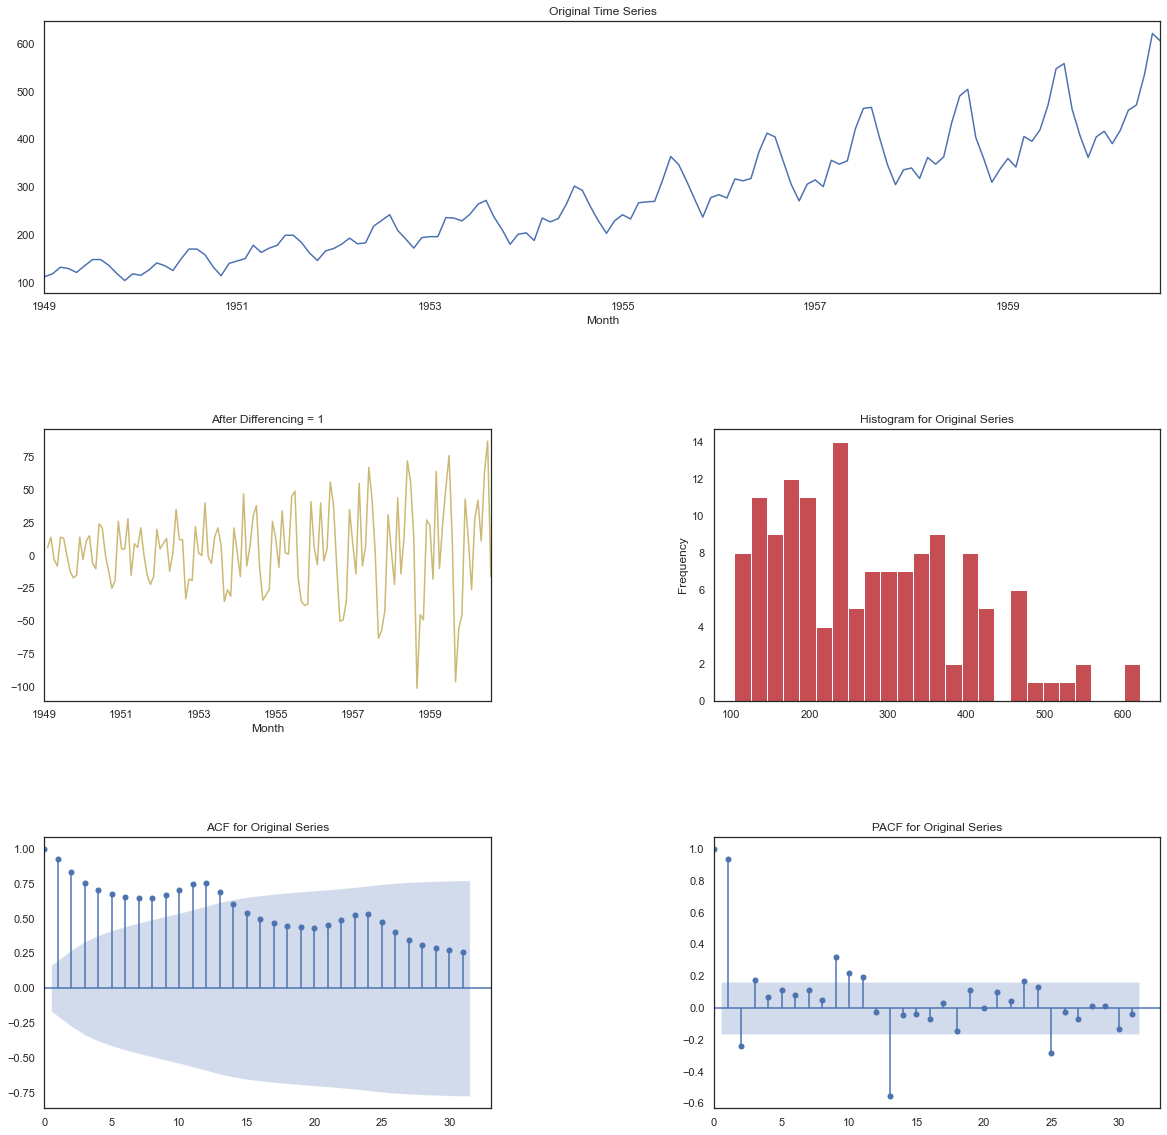

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Creating lag=12 variable using target for Machine Learning model...

Fitting ML model
    14 variables used in training ML model = ['Passengers(t-4)', 'Passengers(t-3)', 'Passengers(t-2)', 'Passengers(t-1)', 'Month_hour', 'Month_minute', 'Month_dayofweek', 'Month_quarter', 'Month_month', 'Month_year', 'Month_dayofyear', 'Month_dayofmonth', 'Month_weekofyear', 'Month_weekend']

Running Cross Validation using XGBoost model..
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 121 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 71.73
    Std Deviation of actuals = 56.69
    Normalized RMSE = 127%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 126 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 31.35
    Std Deviation of actuals = 20.94
    Normalized RMSE = 150%
Cro

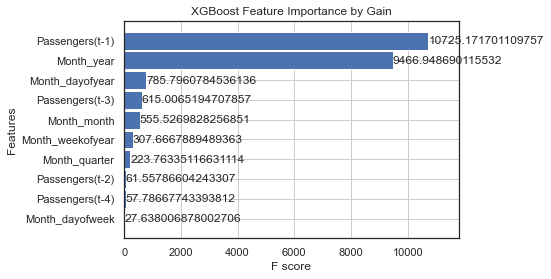

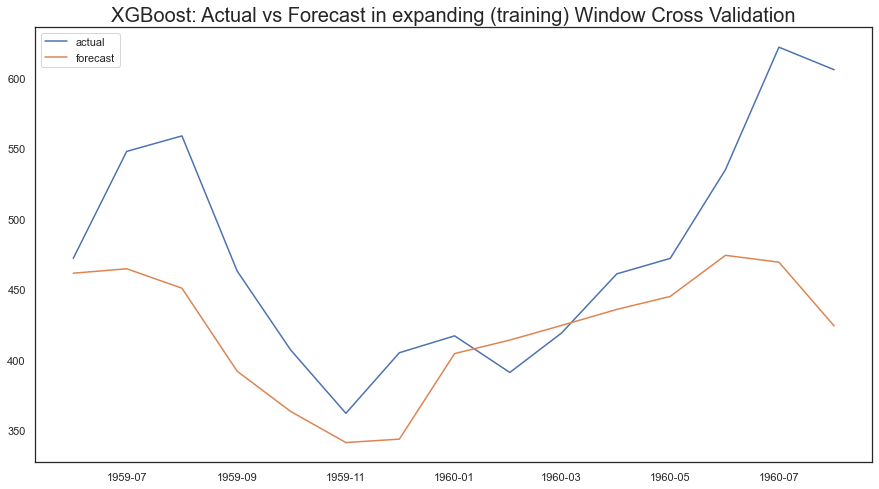

In [9]:
model.fit(
    traindata=traindata,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [10]:
model.get_leaderboard()

,name,rmse
0,ML,71.322627


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

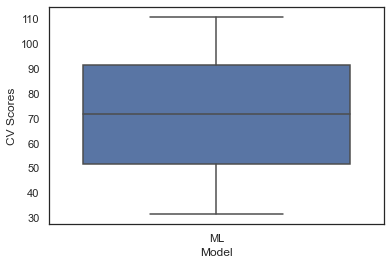

In [11]:
model.plot_cv_scores()

In [12]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,ML,71.729340
1,ML,31.349066
2,ML,110.889474


In [13]:
results_dict = model.get_ml_dict()

In [14]:
results_dict['Prophet']['forecast']  

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [15]:
results_dict['auto_SARIMAX']['forecast'] 

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>()>, {})

In [16]:
results_dict['ML']['forecast'] 

[array([461.48322, 464.6458 , 450.83975, 391.8617 , 363.32312],
       dtype=float32),
 array([341.24146, 343.63333, 404.41254, 414.01135, 424.39148],
       dtype=float32),
 array([435.76025, 445.00555, 474.17432, 469.3415 , 424.0323 ],
       dtype=float32)]

In [18]:
testdata['preds'] = model.predict(testdata, model='ML', simple=False)['yhat'].values

For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    train time series Month column exists ...
Your testdata dataframe contains the target column as well. This will be deleted for the predictions.
    ML predictions completed


<AxesSubplot:>

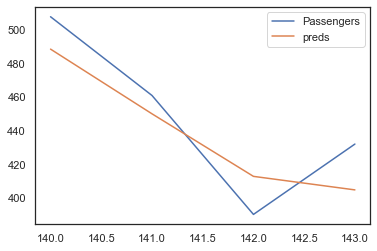

In [19]:
testdata[[target, 'preds']].plot()

In [ ]:
disto

# Forecast Results

In [ ]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

In [ ]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

In [ ]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

In [ ]:
model.get_best_model()

In [ ]:
xgb_model = model.get_model('ML')
xgb_model

In [ ]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [ ]:
# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
dataset['yhat'] = model.predict(dataset, model='ML', simple=False)['yhat'].values

In [ ]:
dataset[[target,'yhat']]

In [ ]:
dataset